In [2]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [4]:
# Load Data
digits = load_digits()

In [5]:
# Create features
X = digits.data

In [6]:
# Create target
y = digits.target

In [7]:
# Check shape of X
X.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

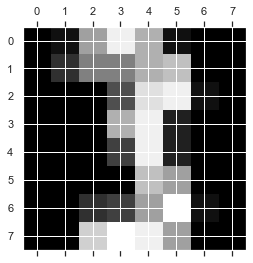

In [8]:
# Let's see how the image looks like
plt.gray() 
plt.matshow(digits.images[59]) 
plt.show()

In [9]:
# Target Value
y[59]

3

In [10]:
from sklearn.model_selection import train_test_split 
X_train , X_test ,y_train , y_test = train_test_split(X, y, test_size = 0.25,random_state=0)

MAX-VOTING

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9044444444444445

In [12]:
pred1 = model.predict(X_test)
pred1

array([2, 3, 2, 6, 6, 7, 1, 9, 8, 2, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 3, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 1, 2, 2, 9, 7, 2, 3, 6, 0, 5, 2, 7, 5,
       1, 2, 0, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 1, 8, 0, 1, 5, 2, 5, 8, 4, 1, 3, 0, 6, 1, 5, 5, 3,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 3, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 1, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 3, 6, 2, 0, 3, 3, 3, 0, 2, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 1, 3, 3, 0, 9, 5, 5, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 2, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 1, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 0, 5, 4, 3, 4, 6, 2, 9, 0,

In [11]:
from sklearn.neighbors import KNeighborsClassifier

AVERAGING

In [12]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred=(pred1+pred2+pred3)/3

In [13]:
finalpred

array([[9.78805428e-15, 7.55700536e-13, 1.00000000e+00, ...,
        2.06710995e-10, 1.64009489e-12, 1.18189996e-15],
       [2.75292521e-08, 1.10440203e-04, 2.67886320e-05, ...,
        1.18308544e-09, 6.36391105e-01, 1.66613837e-08],
       [1.57014657e-21, 2.43362934e-11, 1.00000000e+00, ...,
        4.41811723e-15, 2.21901020e-15, 1.16273328e-18],
       ...,
       [1.58585922e-11, 2.93255184e-15, 5.23847280e-17, ...,
        6.31699743e-17, 1.56364267e-12, 4.72625409e-10],
       [1.62686849e-14, 9.92597224e-01, 2.09120578e-08, ...,
        7.94298842e-12, 3.31748016e-04, 5.64107042e-13],
       [9.70598241e-09, 3.95109789e-17, 5.29234971e-14, ...,
        2.17703936e-12, 3.41440298e-08, 9.99994313e-01]])

WEIGHTED AVERAGE

In [14]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred1=(pred1*0.3+pred2*0.3+pred3*0.4)
 

In [15]:
finalpred1

array([[1.17456651e-14, 9.06840643e-13, 1.00000000e+00, ...,
        2.48053194e-10, 1.96811387e-12, 1.41827995e-15],
       [3.30351025e-08, 1.32528244e-04, 3.21463584e-05, ...,
        1.41970253e-09, 6.63669326e-01, 1.99936604e-08],
       [1.88417588e-21, 2.92035521e-11, 1.00000000e+00, ...,
        5.30174067e-15, 2.66281224e-15, 1.39527993e-18],
       ...,
       [1.90303106e-11, 3.51906220e-15, 6.28616736e-17, ...,
        7.58039692e-17, 1.87637121e-12, 5.67150490e-10],
       [1.95224219e-14, 9.91116668e-01, 2.50944694e-08, ...,
        9.53158610e-12, 3.98097620e-04, 6.76928451e-13],
       [1.16471789e-08, 4.74131747e-17, 6.35081966e-14, ...,
        2.61244723e-12, 4.09728358e-08, 9.99993176e-01]])

BAGGING

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression() 
dt_clf = DecisionTreeClassifier() 
rf_clf = RandomForestClassifier() 
knn_clf = KNeighborsClassifier() 

classifiers =[lr_clf, dt_clf, rf_clf,knn_clf]
for clf in classifiers:
    clf_scores = cross_val_score(clf, X_train, y_train, cv = 10)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=0)
    bagging_clf_scores = cross_val_score(bagging_clf, X_train, y_train, cv = 10)
    print(clf.__class__.__name__, ":::: Mean:", clf_scores.mean(), ", Std Dev:", clf_scores.std())
    print("Bagging", clf.__class__.__name__, ":::: Mean:", bagging_clf_scores.mean(), "Std Dev:", bagging_clf_scores.std(), "\n")

ensembler = VotingClassifier(estimators=[('LogisticRegression', lr_clf), ('DecisionTreeClassifier', dt_clf),
                                        ('RandomForestClassifier', rf_clf), 
                                        ('KNeighborsClassifier', knn_clf)], voting = 'hard')


ensembler_scores = cross_val_score(ensembler, X_train, y_train, cv = 10)
print(ensembler.__class__.__name__, ":::: Mean:", ensembler_scores.mean(), "Std Dev:", clf_scores.std())

LogisticRegression :::: Mean: 0.966589275843007 , Std Dev: 0.012103162157998674
Bagging LogisticRegression :::: Mean: 0.890138197899392 Std Dev: 0.027906409101383024 

DecisionTreeClassifier :::: Mean: 0.8507573244886677 , Std Dev: 0.026544057886113047
Bagging DecisionTreeClassifier :::: Mean: 0.864914317302377 Std Dev: 0.02984238207654206 

RandomForestClassifier :::: Mean: 0.970287451630735 , Std Dev: 0.01452239920138009
Bagging RandomForestClassifier :::: Mean: 0.9331840796019902 Std Dev: 0.019603677503639363 

KNeighborsClassifier :::: Mean: 0.9858872305140961 , Std Dev: 0.011237752854310985
Bagging KNeighborsClassifier :::: Mean: 0.9280044223327805 Std Dev: 0.019293079323269298 

VotingClassifier :::: Mean: 0.9755002763957987 Std Dev: 0.011237752854310985


BOOSTING

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

ab_clf = AdaBoostClassifier() 
gb_clf = GradientBoostingClassifier() 
xgb_clf = XGBClassifier() 

ensembler = VotingClassifier(estimators=[('AdaBoostClassifier', ab_clf), ('GradientBoostingClassifier', gb_clf),
                                        ('XGBClassifier', xgb_clf)], voting = 'hard')

classifiers =[ab_clf, gb_clf, xgb_clf, ensembler]
for clf in classifiers:
    clf_scores = cross_val_score(clf, X_train, y_train, cv = 10)
    print(clf.__class__.__name__, ":::: Mean:", clf_scores.mean(), "Std Dev:", clf_scores.std())

AdaBoostClassifier :::: Mean: 0.2917412935323383 Std Dev: 0.014467564701341888
GradientBoostingClassifier :::: Mean: 0.960630182421227 Std Dev: 0.01493341306292966
XGBClassifier :::: Mean: 0.9598783858485351 Std Dev: 0.018018577703694614
VotingClassifier :::: Mean: 0.95914317302377 Std Dev: 0.016739063553753517


STACKING

In [22]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

def get_stacking():
    level0 = [('lr_classifier', LogisticRegression()), ('dt_classifier', DecisionTreeClassifier()),
              ('knn_classifier', KNeighborsClassifier()), ('svm_classifier', SVC()), ('gnb_classifier', GaussianNB())]
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    return model


lr_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
gnb_classifier = GaussianNB()
stacking_classifier = get_stacking()

classifiers = [lr_classifier, dt_classifier, knn_classifier, svm_classifier, gnb_classifier, stacking_classifier]
for clf in classifiers:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    clf_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print(clf.__class__.__name__, ":::: Mean:", clf_scores.mean(), "Std Dev:", clf_scores.std())

LogisticRegression :::: Mean: 0.9638658559056569 Std Dev: 0.012972943027234587
DecisionTreeClassifier :::: Mean: 0.8467974940114245 Std Dev: 0.026008985392383627
KNeighborsClassifier :::: Mean: 0.9863921135065414 Std Dev: 0.009974818500848482
SVC :::: Mean: 0.9873834531048462 Std Dev: 0.009980704810764629
GaussianNB :::: Mean: 0.8388852036115717 Std Dev: 0.025806522543515405
StackingClassifier :::: Mean: 0.9854007739082365 Std Dev: 0.01107907405869239
